In [1]:
%pylab notebook
plt.ion()

Populating the interactive namespace from numpy and matplotlib


In [2]:
from iminuit import Minuit

In [3]:
datalow=np.genfromtxt('lowC', missing_values='nan')
datahigh=np.genfromtxt('highC', missing_values='nan')

<IPython.core.display.Javascript object>


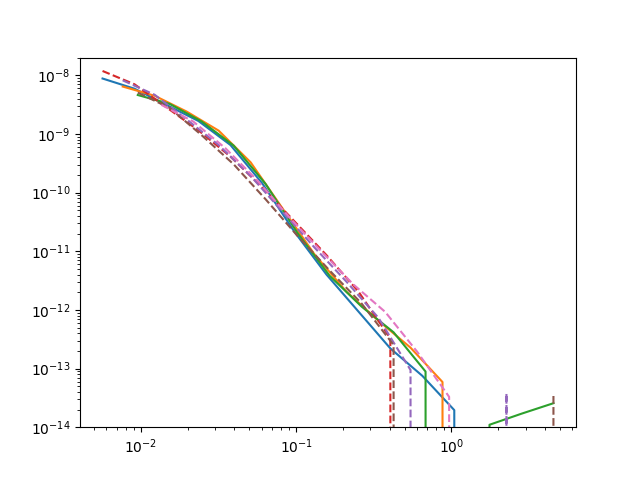

(1e-14, 2e-08)

In [4]:
plt.figure()
plt.loglog(datalow[::2,:][1:4].T,datalow[1::2,:][1:4].T)
plt.loglog(datahigh[1:5].T, datahigh[6:].T, '--')
plt.ylim([1e-14, 2e-8])

In [5]:
def log_sersic(x, k, n, A):
    return A-k*x**(1./n)
def chi2_func(x,y, k, n, A):
    chi2=np.sum((np.log(y)-log_sersic(x, k, n, A))**2)
    return chi2
def likefunc_high(k, n, A):
    x=datahigh[1:5].ravel()
    y=datahigh[6:].ravel()
    sel=y>1e-13
    return chi2_func(x[sel], y[sel], k, n, A)
def likefunc_low(k, n, A):
    x=datalow[::2][1:4].ravel()
    y=datalow[1::2][1:4].ravel()
    sel=y>1e-13
    return chi2_func(x[sel], y[sel], k, n, A)

In [6]:
m=Minuit(likefunc_high, A=np.log(1e-8), k=1, n=1)
result=m.migrad()
pfit_high=[m.values[p] for p in m.parameters]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: errordef is not given. Default to 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter k is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter n is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter A is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


FCN = 2.01277603239 
 TOTAL NCALL = 201 
 NCALLS = 201 
 
 
 EDM = 7.63976876401e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,k,25.5836,8.37323,0,0,,,
2,n,6.63361,3.5395,0,0,,,
3,A,-6.16917,9.07942,0,0,,,


<IPython.core.display.Javascript object>


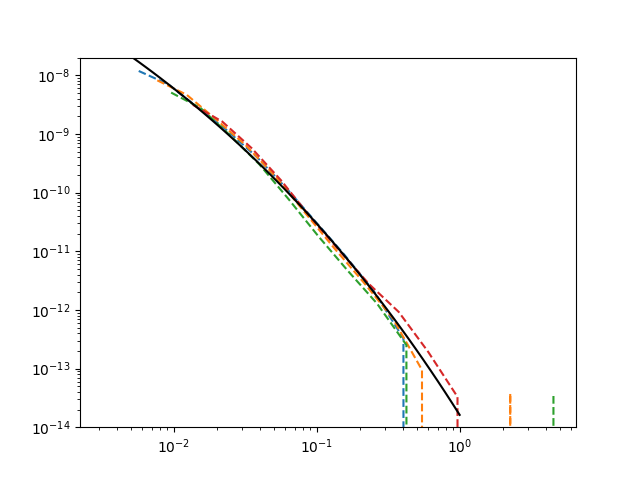

In [7]:
plt.figure()
plt.loglog(datahigh[1:5].T, datahigh[6:].T, '--')
plt.ylim([1e-14, 2e-8])
r=np.logspace(-2.5, 0)
plt.plot(r, np.exp(log_sersic(r, *pfit_high)), 'k')

In [8]:
m=Minuit(likefunc_low, A=-6, k=20, n=5)
result=m.migrad()
pfit_low=[m.values[p] for p in m.parameters]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: errordef is not given. Default to 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter k is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter n is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter A is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


FCN = 5.74746033758 
 TOTAL NCALL = 110 
 NCALLS = 110 
 
 
 EDM = 1.42347996974e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,k,22.4166,4.33189,0,0,,,
2,n,4.80875,1.91636,0,0,,,
3,A,-10.3012,5.09676,0,0,,,


<IPython.core.display.Javascript object>


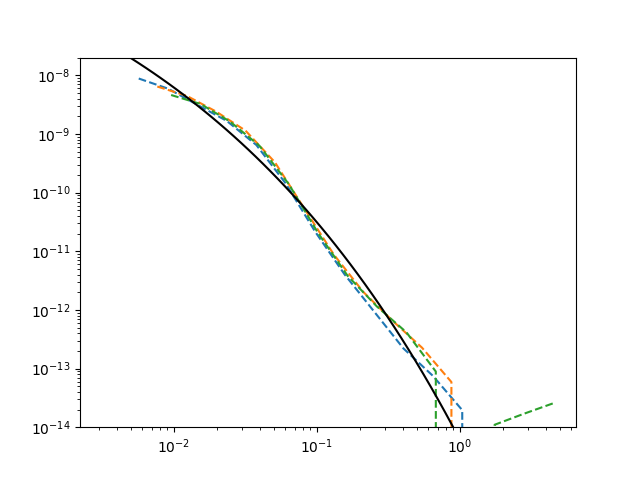

In [9]:
plt.figure()
plt.loglog(datalow[::2][1:4].T, datalow[1::2][1:4].T, '--')
plt.ylim([1e-14, 2e-8])
r=np.logspace(-2.5, 0)
plt.plot(r, np.exp(log_sersic(r, *pfit_low)), 'k')